In [ ]:
# Installing the Necessary Modules

!pip install numpy==1.24.3 scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 35.0 MB/s eta 0:00:00
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505215 sha256=3ed5300a699671e98fde4c21f2dc5a7b2a8ca2f6d4be5005fd24d0c00ff4cd49
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.24

In [ ]:
# Importing the Necessary Modules

# Data Handling and Math
import pandas as pd
import numpy as np
from math import sqrt
import time
import os
import psutil
import tracemalloc

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Surprise Library for Recommender Systems
from surprise import Dataset, Reader, SVD, KNNBasic, NMF
from surprise.model_selection import cross_validate, train_test_split

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prettify plots
sns.set(style="whitegrid")

For Movie Lens Dataset

In [ ]:
# Loading the dataset

names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv("./Dataset/ml-100k/u.data", sep='\t', names=names)

In [ ]:
# Preprocessing the dataset

df.dropna(inplace=True)

In [ ]:
# Reader: Specify rating scale

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'item_id', 'rating']], reader)

In [ ]:
# Defining the models

models = {
    "SVD": SVD(),
    "KNN": KNNBasic(),
    "NMF": NMF()
}

In [ ]:
# to store the results

results = []

In [ ]:
# Evaluating the models

for name, algo in models.items():

    print(f"Training {name}...")

    tracemalloc.start() # To track thhe used memory and time
    start = time.time()

    # Cross-validate with 5-fold
    cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

    end = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Store the formated result

    results.append({
        'Model': name,
        'Avg Fit Time (s)': round(np.mean(cv_results['fit_time']), 4),
        'Avg Memory (KB)': round(peak / 1024, 2),
        'Avg RMSE': round(np.mean(cv_results['test_rmse']), 4),
        'Avg MAE': round(np.mean(cv_results['test_mae']), 4)
    })

Training SVD...
Training KNN...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Training NMF...


In [ ]:
# Creating dataframe from results

results_df = pd.DataFrame(results)
print("\nEvaluation Summary:")
print(results_df)


Evaluation Summary:
  Model  Avg Fit Time (s)  Avg Memory (KB)  Avg RMSE  Avg MAE
0   SVD            2.7682         27670.97    0.9369   0.7386
1   KNN            0.6611         41717.65    0.9800   0.7736
2   NMF            6.3900         25951.94    0.9638   0.7579


<ipython-input-13-42e1b2ec66b1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='Set2')
<ipython-input-13-42e1b2ec66b1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='Set2')
<ipython-input-13-42e1b2ec66b1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='Set2')
<ipython-input-13-42e1b2ec66b1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

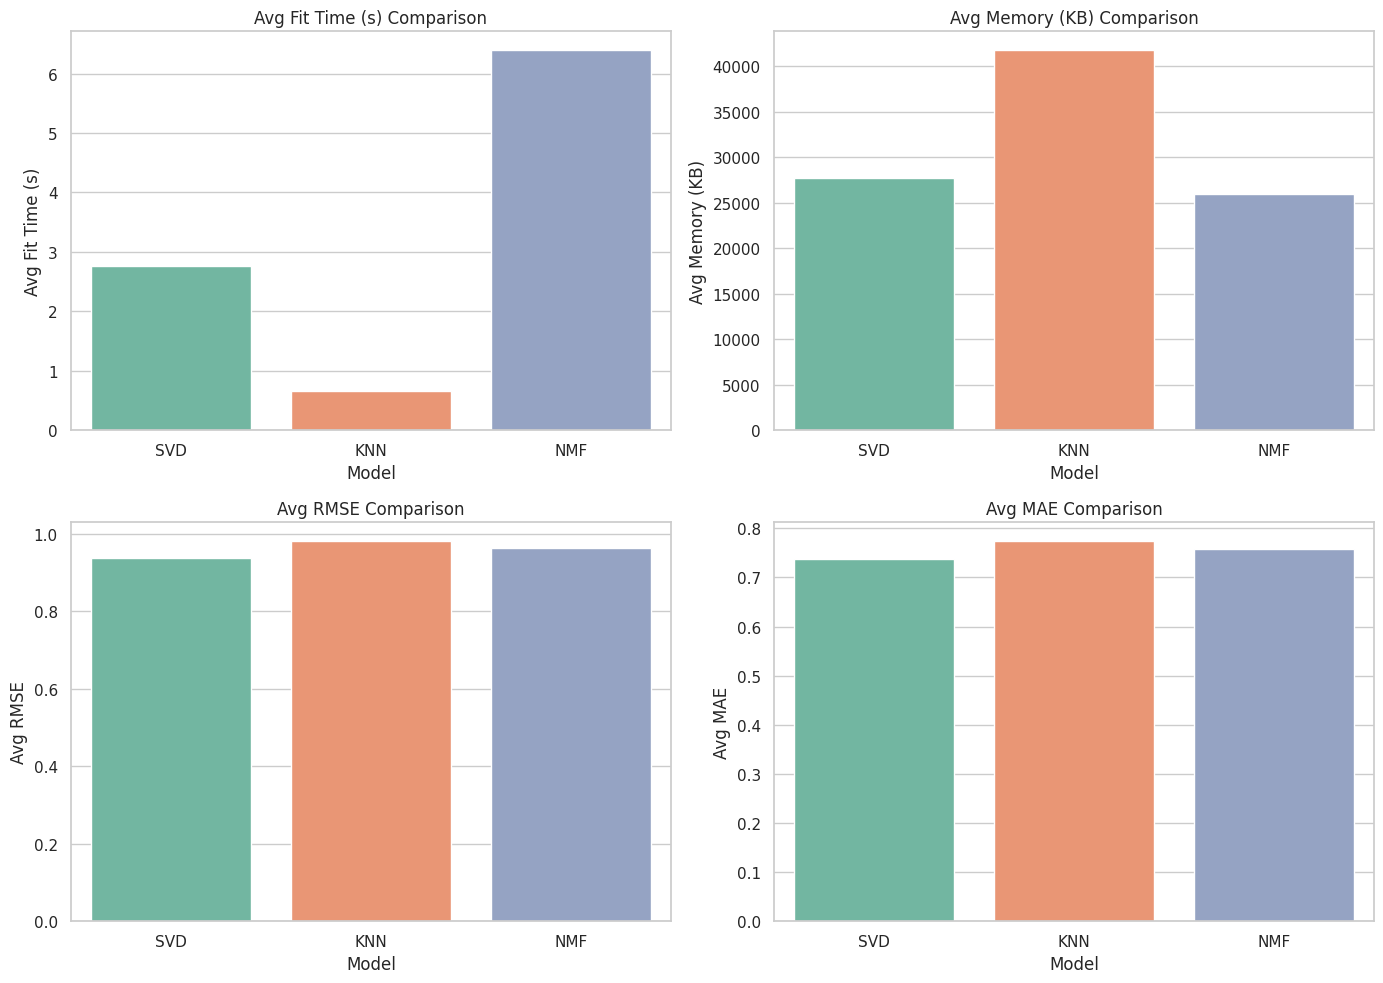

In [ ]:
# Plotting the result

metrics = ['Avg Fit Time (s)', 'Avg Memory (KB)', 'Avg RMSE', 'Avg MAE']

plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x='Model', y=metric, data=results_df, palette='Set2')
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.xlabel("Model")

plt.tight_layout()
plt.show()

Using Folds

In [ ]:
data_dir = "./Dataset/ml-100k/"
folds = ['u1', 'u2', 'u3', 'u4', 'u5']
algorithms = {'SVD': SVD(), 'KNN': KNNBasic(), 'NMF': NMF()}
reader = Reader(line_format='user item rating timestamp', sep='\t')

In [ ]:
# Store metrics
results = {alg: {'fit_time': [], 'rmse': [], 'mae': []} for alg in algorithms}

In [ ]:
# Memory usage helper
def get_memory_usage():
    return psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2  # in MB

In [ ]:
# Loop through each fold
for fold in folds:
    train_file = os.path.join(data_dir, f"{fold}.base")
    test_file = os.path.join(data_dir, f"{fold}.test")

    train_data = Dataset.load_from_file(train_file, reader=reader)
    test_data = Dataset.load_from_file(test_file, reader=reader)

    trainset = train_data.build_full_trainset()
    testset = test_data.build_full_trainset().build_testset()

    for name, algo in algorithms.items():
        start_mem = get_memory_usage()
        start_time = time.time()

        algo.fit(trainset)
        fit_time = time.time() - start_time
        mem_used = get_memory_usage() - start_mem

        predictions = algo.test(testset)
        y_true = [pred.r_ui for pred in predictions]
        y_pred = [pred.est for pred in predictions]

        rmse = sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)

        results[name]['fit_time'].append(fit_time)
        results[name]['rmse'].append(rmse)
        results[name]['mae'].append(mae)
        results[name].setdefault('memory', []).append(mem_used)

results_avg = {alg: {
    'avg_fit_time': np.mean(metrics['fit_time']),
    'avg_rmse': np.mean(metrics['rmse']),
    'avg_mae': np.mean(metrics['mae']),
    'avg_memory': np.mean(metrics['memory'])
} for alg, metrics in results.items()}

results_avg

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


{'SVD': {'avg_fit_time': 0.9752765655517578,
  'avg_rmse': 0.9379084721144004,
  'avg_mae': 0.7387889210594255,
  'avg_memory': 0.0},
 'KNN': {'avg_fit_time': 0.27670974731445314,
  'avg_rmse': 0.9801049536251618,
  'avg_mae': 0.7744033822812626,
  'avg_memory': -0.4},
 'NMF': {'avg_fit_time': 1.0710529804229736,
  'avg_rmse': 0.9662611825954098,
  'avg_mae': 0.7594243283218008,
  'avg_memory': -1.959375}}

In [ ]:
results_df = pd.DataFrame(results_avg)
print("\nEvaluation Summary:")
print(results_df)


Evaluation Summary:
                   SVD       KNN       NMF
avg_fit_time  0.975277  0.276710  1.071053
avg_rmse      0.937908  0.980105  0.966261
avg_mae       0.738789  0.774403  0.759424
avg_memory    0.000000 -0.400000 -1.959375


<ipython-input-24-f81bcd977750>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='Set2')
<ipython-input-24-f81bcd977750>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='Set2')
<ipython-input-24-f81bcd977750>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='Set2')
<ipython-input-24-f81bcd977750>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

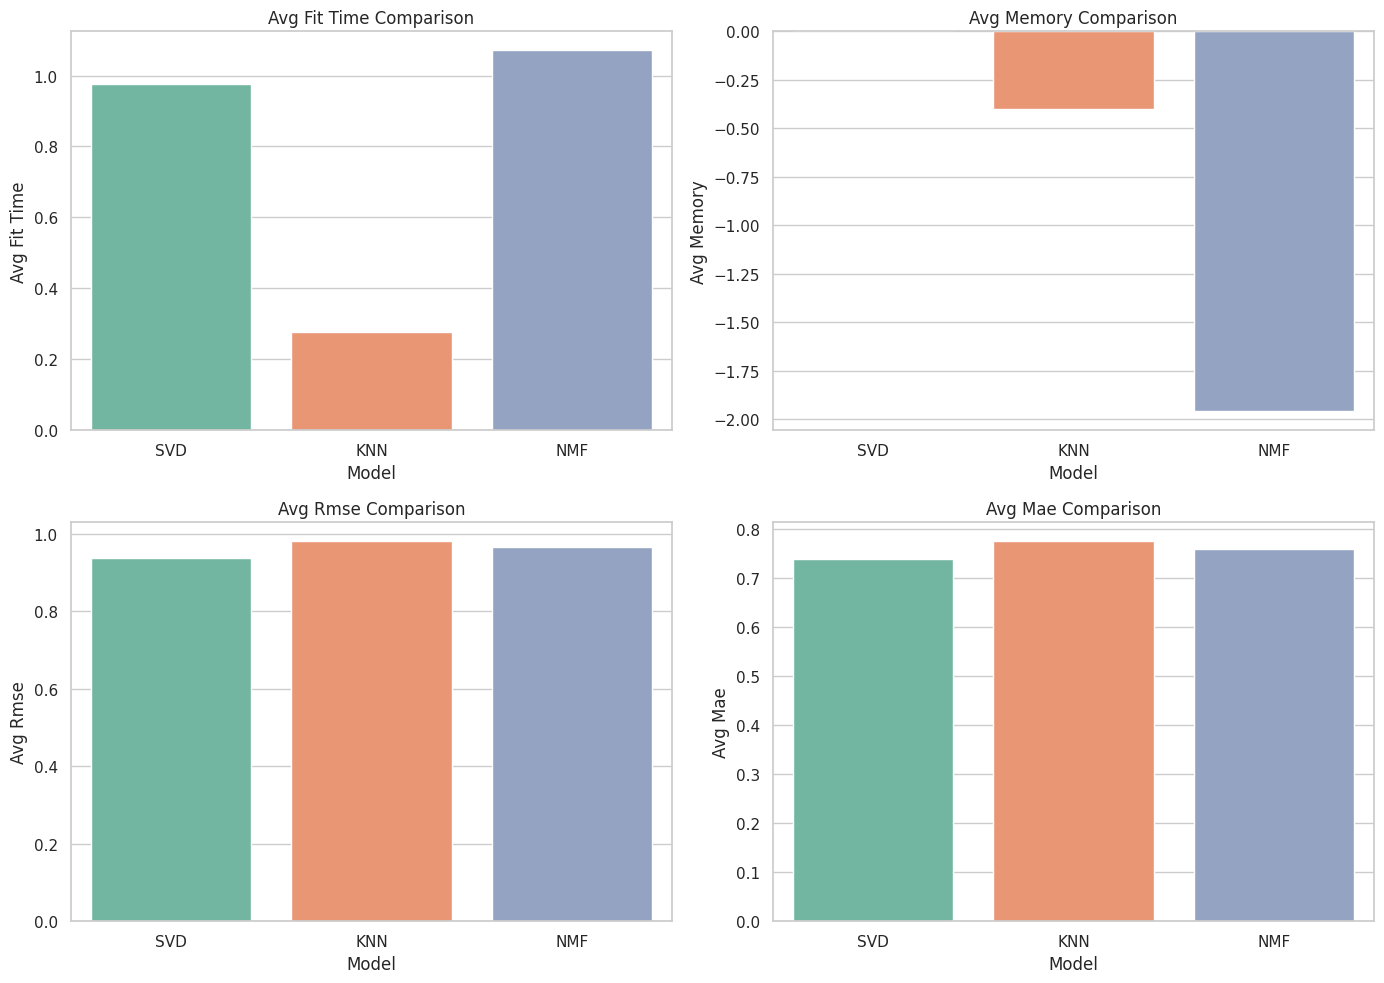

In [ ]:
results_df = pd.DataFrame(results_avg).T.reset_index() # Transpose and reset index
results_df = results_df.rename(columns={'index': 'Model'}) # Rename index column to 'Model'

metrics = ['avg_fit_time', 'avg_memory', 'avg_rmse', 'avg_mae']  # Use actual column names

plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x='Model', y=metric, data=results_df, palette='Set2')
    plt.title(f'{metric.replace("_", " ").title()} Comparison') # Format title
    plt.ylabel(metric.replace("_", " ").title())  # Format ylabel
    plt.xlabel("Model")

plt.tight_layout()
plt.show()

For Jester Dataset

In [ ]:
!pip install memory-profiler


Training SVD...
Evaluating RMSE, MAE of algorithm SVD on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    4.2306  4.2310  4.2308  0.0002  
MAE (testset)     3.3025  3.3020  3.3023  0.0002  
Fit time          17.16   19.16   18.16   1.00    
Test time         13.52   12.86   13.19   0.33    
Evaluating RMSE, MAE of algorithm SVD on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    4.2361  4.2233  4.2297  0.0064  
MAE (testset)     3.3047  3.2983  3.3015  0.0032  
Fit time          16.31   17.57   16.94   0.63    
Test time         12.09   13.37   12.73   0.64    

Training NMF...
Evaluating RMSE, MAE of algorithm NMF on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    5.4508  5.3088  5.3798  0.0710  
MAE (testset)     4.5731  4.4911  4.5321  0.0410  
Fit time          22.37   23.05   22.71   0.34    
Test time         11.69   11.95   11.82   0.13    
Evaluating RMSE, MAE of algorithm NMF o

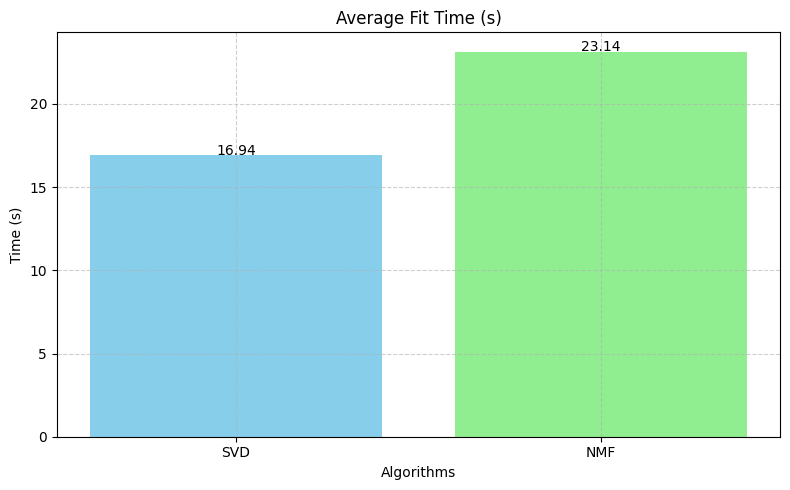

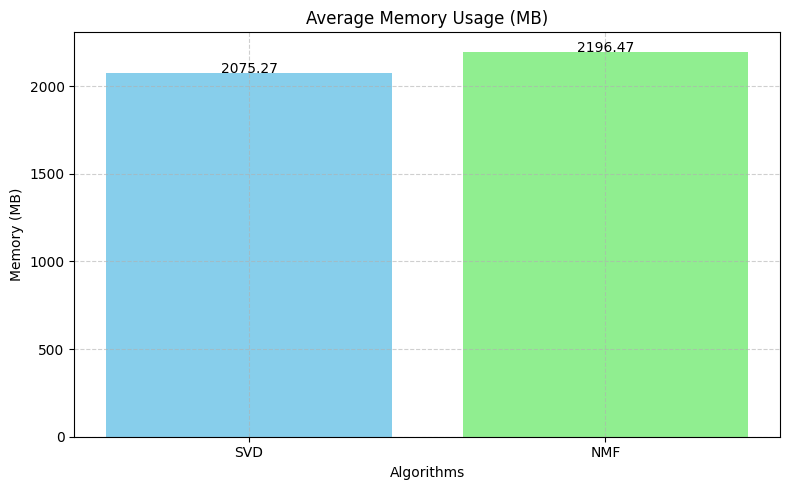

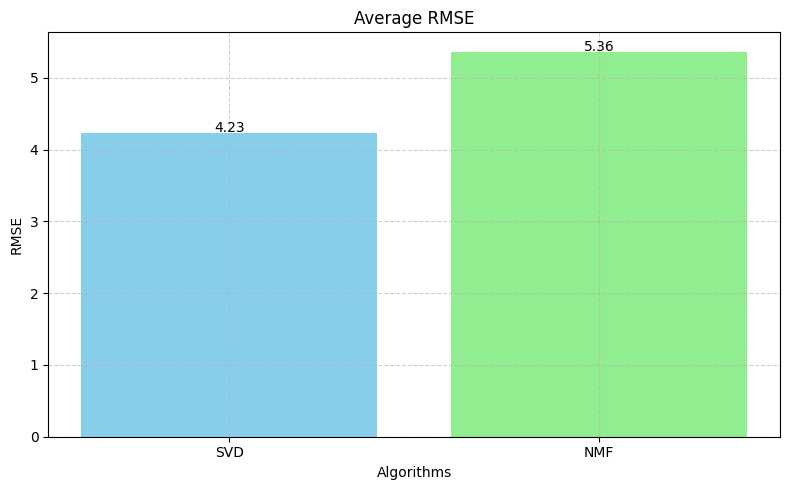

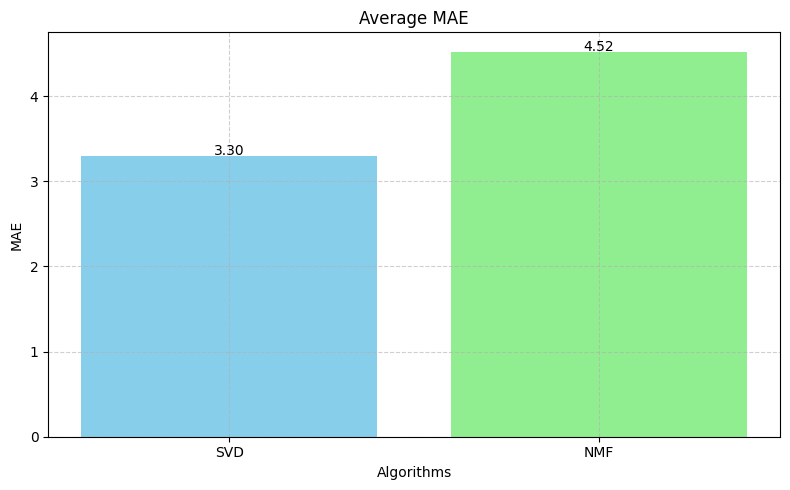

In [3]:
import numpy as np
import pandas as pd
import time
import psutil
import matplotlib.pyplot as plt
from surprise import SVD, KNNBasic, NMF, Dataset, Reader
from surprise.model_selection import cross_validate
from memory_profiler import memory_usage

# Load Dataset
file_path = "./Dataset/jester-data-1.xls"

# Read the file, skip the first column
raw_df = pd.read_excel(file_path, header=None)
data_df = raw_df.iloc[:, 1:]  # shape: (24983, 100)

# Convert 99.0 (missing value) to NaN
data_df = data_df.replace(99.0, np.nan)

# Reshape into long format suitable for Surprise library
long_data = data_df.stack().reset_index()
long_data.columns = ['user', 'item', 'rating']
long_data['user'] = long_data['user'].astype(str)
long_data['item'] = long_data['item'].astype(str)

# Create Reader and Dataset object
reader = Reader(rating_scale=(-10, 10))
dataset = Dataset.load_from_df(long_data[['user', 'item', 'rating']], reader)

# Define models
models = {
    'SVD': SVD(),
    # 'KNN': KNNBasic(),
    'NMF': NMF()
}

# Store results
fit_times = {}
mem_usages = {}
rmses = {}
maes = {}

# Evaluate models
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    def train_model():
        return cross_validate(model, dataset, measures=['RMSE', 'MAE'], cv=2, verbose=True)

    # Measure time and memory
    start_time = time.time()
    mem_usage = memory_usage((train_model,), max_usage=True)
    duration = time.time() - start_time
    results = train_model()

    fit_times[model_name] = np.mean(results['fit_time'])
    mem_usages[model_name] = mem_usage
    rmses[model_name] = np.mean(results['test_rmse'])
    maes[model_name] = np.mean(results['test_mae'])

# Plotting the results
def plot_metric(title, data, ylabel):
    plt.figure(figsize=(8, 5))
    plt.bar(data.keys(), data.values(), color=['skyblue', 'lightgreen', 'salmon'])
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Algorithms")
    for i, v in enumerate(data.values()):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

plot_metric("Average Fit Time (s)", fit_times, "Time (s)")
plot_metric("Average Memory Usage (MB)", mem_usages, "Memory (MB)")
plot_metric("Average RMSE", rmses, "RMSE")
plot_metric("Average MAE", maes, "MAE")
